In [32]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

check:

1. relation between time and popularity
2. analysis based on price/time
3. try different regression or neural network
4. summarize the results and modify the document

In [33]:
data = pd.read_csv("../data/board-game.csv")
high_score = pd.read_csv("../data/high_score.csv")
low_score = pd.read_csv("../data/low_score.csv")

In [34]:
# price = pd.read_csv("../data/price.csv")

In [35]:
data

,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,avg_rate,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
0,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,7.55005,774,4200,76,359,1561,522,93,2.4516
1,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,6.99382,1123,6348,229,215,1233,1097,106,2.0189
2,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,7.45702,591,6917,130,291,1318,1481,386,2.6632
3,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,7.17658,462,29303,300,304,2505,2431,353,1.1530
4,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,6.99363,1072,7998,167,116,662,1020,240,1.3917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,The Pursuit of Happiness,2015,1,4,60,90,12,['Economic'],"['End Game Bonuses', 'Income', 'Open Drafting'...",5261,7.18274,805,8574,198,297,1762,1081,135,2.5037
1996,First Rat,2022,1,5,30,75,10,"['Adventure', 'Animals', 'Humor', 'Space Explo...","['Point to Point Movement', 'Set Collection', ...",2457,7.64693,875,4190,31,285,1454,383,83,2.2771
1997,Small World of Warcraft,2020,2,5,40,80,8,"['Fantasy', 'Fighting', 'Territory Building', ...","['Area Majority / Influence', 'Area Movement',...",3055,7.34986,1090,8963,131,114,1214,469,64,2.5938
1998,Container,2007,3,5,60,90,12,"['Economic', 'Industry / Manufacturing', 'Naut...","['Auction/Bidding', 'Auction: Sealed Bid', 'Co...",4710,7.15592,892,3204,69,616,1966,1495,386,3.2409


In [36]:
high_score

,Unnamed: 0,score
0,337765,59.347971
1,205597,38.289386
2,2346,53.014469
3,274960,41.117708
4,153065,34.530331
...,...,...
1995,181687,44.305477
1996,347703,64.793856
1997,309630,49.494620
1998,26990,47.041357


In [37]:
high_score.drop("Unnamed: 0", axis = 1, inplace=True)
high_score
low_score.drop("Unnamed: 0", axis = 1, inplace=True)
low_score

,score
0,0.499002
1,1.684024
2,1.225884
3,0.576550
4,1.014405
...,...
1995,1.402312
1996,0.282943
1997,1.304206
1998,3.181336


In [38]:
print(data.info())
print(low_score.info())
print(high_score.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          2000 non-null   object 
 1   Year          2000 non-null   int64  
 2   min_players   2000 non-null   int64  
 3   max_players   2000 non-null   int64  
 4   min_playtime  2000 non-null   int64  
 5   max_playtime  2000 non-null   int64  
 6   min_age       2000 non-null   int64  
 7   category      2000 non-null   object 
 8   mechanic      2000 non-null   object 
 9   userrated     2000 non-null   int64  
 10  avg_rate      2000 non-null   float64
 11  rank          2000 non-null   int64  
 12  owned         2000 non-null   int64  
 13  trading       2000 non-null   int64  
 14  wanting       2000 non-null   int64  
 15  wishing       2000 non-null   int64  
 16  num_comments  2000 non-null   int64  
 17  num_weights   2000 non-null   int64  
 18  avg_weight    2000 non-null 

In [39]:
data.drop("avg_rate",axis=1, inplace=True)

In [40]:
high_data = high_score.join(data)
low_data = low_score.join(data)
low_data

,score,Name,Year,min_players,max_players,min_playtime,max_playtime,min_age,category,mechanic,userrated,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
0,0.499002,Brian Boru: High King of Ireland,2021,3,5,60,90,14,"['Card Game', 'Medieval', 'Territory Building']","['Area Majority / Influence', 'Closed Drafting...",3003,774,4200,76,359,1561,522,93,2.4516
1,1.684024,Jump Drive,2017,2,4,10,30,13,"['Card Game', 'Science Fiction', 'Space Explor...","['Hand Management', 'Simultaneous Action Selec...",4510,1123,6348,229,215,1233,1097,106,2.0189
2,1.225884,DVONN,2001,2,2,30,30,9,['Abstract Strategy'],"['Grid Movement', 'Map Reduction']",4960,591,6917,130,291,1318,1481,386,2.6632
3,0.576550,Point Salad,2019,2,6,15,30,8,['Card Game'],"['Open Drafting', 'Set Collection']",17480,462,29303,300,304,2505,2431,353,1.1530
4,1.014405,Linko,2014,2,5,20,20,10,['Card Game'],"['Hand Management', 'Move Through Deck', 'Open...",4926,1072,7998,167,116,662,1020,240,1.3917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.402312,The Pursuit of Happiness,2015,1,4,60,90,12,['Economic'],"['End Game Bonuses', 'Income', 'Open Drafting'...",5261,805,8574,198,297,1762,1081,135,2.5037
1996,0.282943,First Rat,2022,1,5,30,75,10,"['Adventure', 'Animals', 'Humor', 'Space Explo...","['Point to Point Movement', 'Set Collection', ...",2457,875,4190,31,285,1454,383,83,2.2771
1997,1.304206,Small World of Warcraft,2020,2,5,40,80,8,"['Fantasy', 'Fighting', 'Territory Building', ...","['Area Majority / Influence', 'Area Movement',...",3055,1090,8963,131,114,1214,469,64,2.5938
1998,3.181336,Container,2007,3,5,60,90,12,"['Economic', 'Industry / Manufacturing', 'Naut...","['Auction/Bidding', 'Auction: Sealed Bid', 'Co...",4710,892,3204,69,616,1966,1495,386,3.2409


C:\Users\fsd_n\AppData\Local\Temp\ipykernel_14632\3651047939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(high_data.corr(), vmin = 0, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')


<Axes: >

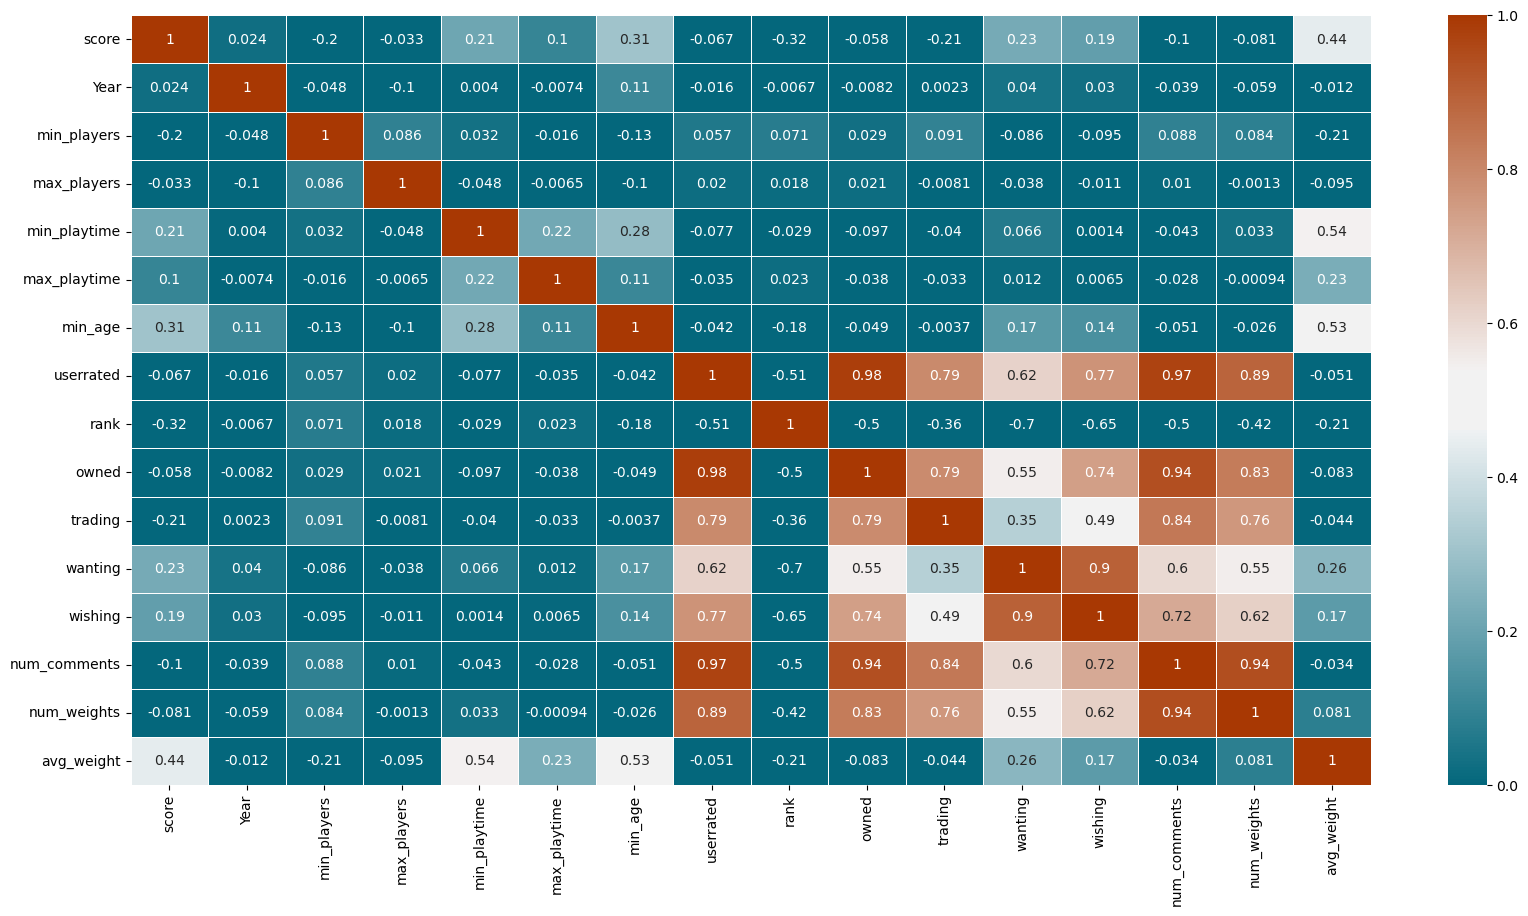

In [41]:
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(220, 20, l=40, s=99, sep=20, center='light', as_cmap=True)
sns.heatmap(high_data.corr(), vmin = 0, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')

C:\Users\fsd_n\AppData\Local\Temp\ipykernel_14632\1806840773.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(low_data.corr(), vmin = 0, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')


<Axes: >

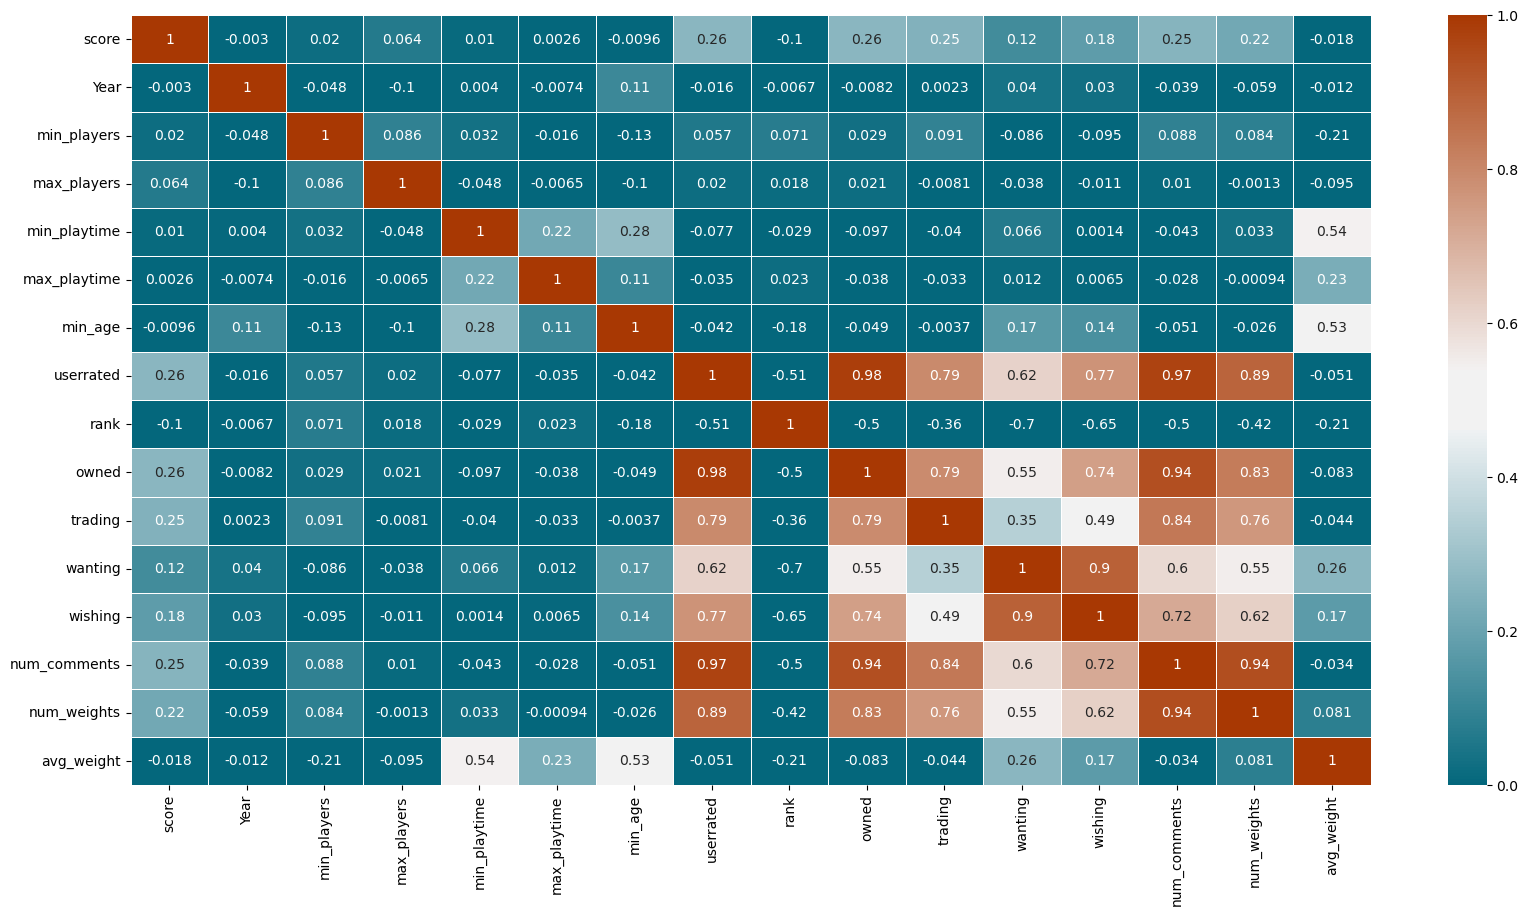

In [42]:
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(220, 20, l=40, s=99, sep=20, center='light', as_cmap=True)
sns.heatmap(low_data.corr(), vmin = 0, vmax=1,annot=True, lw=.5, cmap=cmap,linecolor='white')

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn.ensemble import RandomForestRegressor as RandForest
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
x = high_data.drop(['score','Name', 'category', 'mechanic'],axis=1)
y = high_data.score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [53]:
x_train

,Year,min_players,max_players,min_playtime,max_playtime,min_age,userrated,rank,owned,trading,wanting,wishing,num_comments,num_weights,avg_weight
1504,2019,2,4,60,60,12,12744,231,21694,259,493,4131,1680,311,2.6688
575,2019,1,4,120,120,14,1754,1364,3308,91,215,1357,489,90,3.4333
1959,2002,2,5,35,35,8,12698,596,17054,375,256,1326,3406,1088,1.9219
1264,2018,1,4,20,80,14,2327,1780,5016,122,189,1268,588,86,3.0116
1984,2015,2,4,20,30,13,3731,1953,11940,280,48,438,675,87,1.8391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1986,2,7,180,360,14,5472,255,8436,174,398,1565,1777,573,4.1606
568,2018,1,4,90,120,14,18854,82,25195,363,687,5396,2694,821,3.7808
1219,2014,3,5,90,90,16,1587,1404,3106,65,42,427,331,64,2.6250
732,2004,2,5,30,60,8,85875,221,122829,1062,701,7415,14230,4916,1.8336


In [54]:
las = Lasso(alpha=1.0)
las.fit(x_train, y_train)
y_pred = las.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

las_coeff_tot = pd.Series(las.coef_[0], index = x.columns)
print(las_coeff_tot)

Mean Squared Error: 221.91904523157982
Root Mean Squared Error: 14.896947513889542
Mean Absolute Error: 9.755878220528638
Year            0.00331
min_players     0.00331
max_players     0.00331
min_playtime    0.00331
max_playtime    0.00331
min_age         0.00331
userrated       0.00331
rank            0.00331
owned           0.00331
trading         0.00331
wanting         0.00331
wishing         0.00331
num_comments    0.00331
num_weights     0.00331
avg_weight      0.00331
dtype: float64


In [55]:
rid = Ridge(alpha=1.0)
rid.fit(x_train, y_train)
y_pred = rid.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

rid_coeff_tot = pd.Series(rid.coef_[0], index = x.columns)
print(rid_coeff_tot)

Mean Squared Error: 216.26173097182638
Root Mean Squared Error: 14.705840029451782
Mean Absolute Error: 9.624788973879761
Year            0.004095
min_players     0.004095
max_players     0.004095
min_playtime    0.004095
max_playtime    0.004095
min_age         0.004095
userrated       0.004095
rank            0.004095
owned           0.004095
trading         0.004095
wanting         0.004095
wishing         0.004095
num_comments    0.004095
num_weights     0.004095
avg_weight      0.004095
dtype: float64


In [56]:
tree = DTree(max_depth=5)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

feature_importance = pd.Series(tree.feature_importances_, index = x.columns)
print(feature_importance)


Mean Squared Error: 241.89474673046698
Root Mean Squared Error: 15.552965849974306
Mean Absolute Error: 10.143908024149125
Year            0.163039
min_players     0.000000
max_players     0.011410
min_playtime    0.014787
max_playtime    0.000000
min_age         0.000000
userrated       0.016788
rank            0.151190
owned           0.000000
trading         0.155618
wanting         0.034455
wishing         0.003087
num_comments    0.012834
num_weights     0.062947
avg_weight      0.373845
dtype: float64


In [57]:
fore = RandForest(n_estimators=100)
fore.fit(x_train, y_train)
y_pred = fore.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

feature_importance = pd.Series(fore.feature_importances_, index = x.columns)
print(feature_importance)

Mean Squared Error: 156.32919015672974
Root Mean Squared Error: 12.503167205021683
Mean Absolute Error: 6.650599111774019
Year            0.092569
min_players     0.005843
max_players     0.021721
min_playtime    0.021355
max_playtime    0.029013
min_age         0.012583
userrated       0.088346
rank            0.219270
owned           0.031913
trading         0.120046
wanting         0.036725
wishing         0.032878
num_comments    0.050988
num_weights     0.047270
avg_weight      0.189480
dtype: float64
